In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv('http://taanila.fi/sales_data_sample.csv', encoding='cp1252')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [13]:
df1=pd.crosstab(df["COUNTRY"], "n")
df1.columns.name = ''
df1

,n
COUNTRY,
Australia,185
Austria,55
Belgium,33
Canada,70
Denmark,63
Finland,92
France,314
Germany,62
Ireland,16


In [14]:
df1['%'] = df1/df1.sum()
df1.style.format({'%': '{:.1%}'})

,n,%
COUNTRY,,
Australia,185,6.6%
Austria,55,1.9%
Belgium,33,1.2%
Canada,70,2.5%
Denmark,63,2.2%
Finland,92,3.3%
France,314,11.1%
Germany,62,2.2%
Ireland,16,0.6%


[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%'),
 Text(0, 0, '30%'),
 Text(0, 0, '35%'),
 Text(0, 0, '40%')]

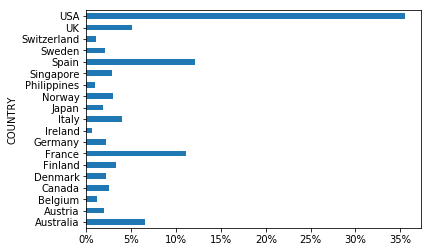

In [15]:
ax = df1['%'].plot.barh(color = 'C0')
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

Text(0.5, 0, 'Tilausten kpl määrät maittain')

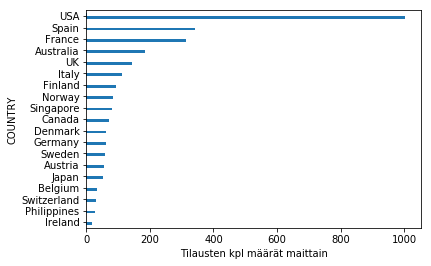

In [20]:
df1.sort_values(by = 'n').plot.barh(legend = False, color = 'C0')
plt.xlabel('Tilausten kpl määrät maittain')

In [21]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [22]:
dfn=df.groupby("DEALSIZE")["COUNTRY"].count()
dfn

DEALSIZE
Large      157
Medium    1384
Small     1282
Name: COUNTRY, dtype: int64

In [23]:
df2=pd.crosstab(df['DEALSIZE'], df['COUNTRY'], normalize = 'columns')

df2.style.format('{:.1%}')

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
DEALSIZE,,,,,,,,,,,,,,,,,,,
Large,3.8%,7.3%,0.0%,1.4%,9.5%,5.4%,6.7%,6.5%,12.5%,6.2%,5.8%,5.9%,3.8%,5.1%,5.0%,3.5%,0.0%,2.8%,6.4%
Medium,46.5%,52.7%,45.5%,47.1%,49.2%,50.0%,47.5%,48.4%,37.5%,38.9%,40.4%,49.4%,53.8%,48.1%,50.0%,54.4%,71.0%,49.3%,50.3%
Small,49.7%,40.0%,54.5%,51.4%,41.3%,44.6%,45.9%,45.2%,50.0%,54.9%,53.8%,44.7%,42.3%,46.8%,45.0%,42.1%,29.0%,47.9%,43.3%


In [28]:
df2=pd.crosstab(df['YEAR_ID'], df['DEALSIZE'], normalize = 'columns')

df2.style.format('{:.1%}')

DEALSIZE,Large,Medium,Small
YEAR_ID,,,
2003,34.4%,36.3%,34.6%
2004,40.1%,46.8%,49.5%
2005,25.5%,16.9%,15.9%


[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%')]

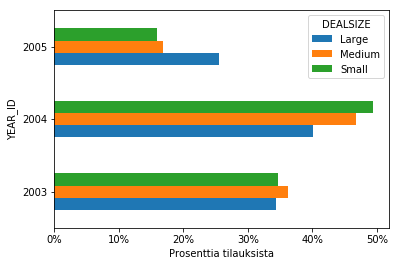

In [31]:
ax = df2.plot.barh()
plt.xlabel('Prosenttia tilauksista')
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])